In [64]:
import torch 
import torch.optim as optim
import numpy as np 
import torch.nn as nn 
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
np.random.seed(42) # Generatic Syntic housing dataset
x = np.random.rand(100, 1) * 10 # Feature Housing price zero to ten
y = 2.5*x + np.random.randn(100, 1)*2 + 5 # adding some noise in data for more realstic

# Convert to py-torch tenosors
X_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Define the Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1) # One Input feature and One output Feature


    def forward(self, x):
        return self.linear(x)
    
model = LinearRegression()

# Intialize the loss function, optimizer 

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num = 1000
for epochs in range(num):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_fn(output, y_train)
    loss.backward()
    optimizer.step()

    if (epochs + 1) % 100 == 0:
        print(f"Epochs[{epochs + 1}/{num}]| Loss: {loss.item():.4f}")


Epochs[100/1000]| Loss: 5.4709
Epochs[200/1000]| Loss: 3.9642
Epochs[300/1000]| Loss: 3.4689
Epochs[400/1000]| Loss: 3.3061
Epochs[500/1000]| Loss: 3.2526
Epochs[600/1000]| Loss: 3.2350
Epochs[700/1000]| Loss: 3.2292
Epochs[800/1000]| Loss: 3.2273
Epochs[900/1000]| Loss: 3.2266
Epochs[1000/1000]| Loss: 3.2264


In [70]:
y.shape

(100, 1)

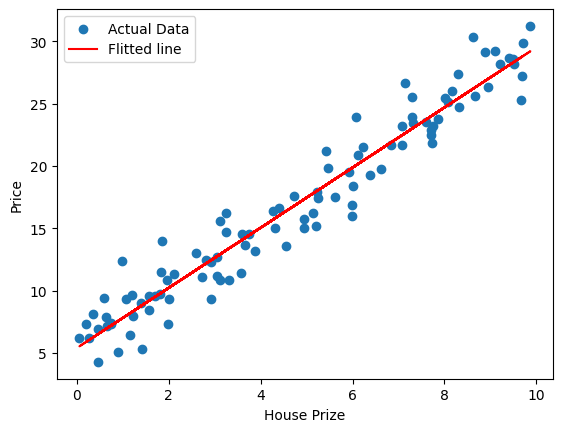

In [79]:
predicted = model(X_train).detach().numpy()
plt.scatter(x, y, label='Actual Data')
plt.plot(x, predicted, color='red', label='Flitted line')
plt.xlabel("House Prize")
plt.ylabel('Price')
plt.legend()
plt.show()